In [1]:
!pip install decision-tree-id3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [3]:
from id3 import Id3Estimator
%matplotlib inline
data = pd.read_csv('PlayTennis.csv')
data.head(15)

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlook'] = le.fit_transform(data['Outlook'])
data['Temperature'] = le.fit_transform(data['Temperature'])
data['Humidity'] = le.fit_transform(data['Humidity'])
data['Wind'] = le.fit_transform(data['Wind'])
data['Play Tennis'] = le.fit_transform(data['Play Tennis'])
data.head(15)

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [6]:
ind =data.drop(['Play Tennis'],axis=1);
dep = data['Play Tennis']
ind.head(15)

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [7]:
from sklearn.model_selection import train_test_split
ind_train,ind_test,dep_train,dep_test = train_test_split(ind,dep,test_size=0.9,random_state=0)

In [8]:
ind_train

,Outlook,Temperature,Humidity,Wind
12,0,1,1,1


In [9]:
dep_train

12    1
Name: Play Tennis, dtype: int64

In [10]:
ind_test

,Outlook,Temperature,Humidity,Wind
8,2,0,1,1
6,0,0,1,0
4,1,0,1,1
11,0,2,0,0
2,0,1,0,1
13,1,2,0,0
9,1,2,1,1
1,2,1,0,0
7,2,2,0,1
10,2,2,1,0


In [11]:
dep_test

8     1
6     1
4     1
11    1
2     1
13    0
9     1
1     0
7     0
10    1
3     1
0     0
5     0
Name: Play Tennis, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
ind_train,ind_test,dep_train,dep_test=train_test_split(ind,dep,test_size=0.5,random_state=0)

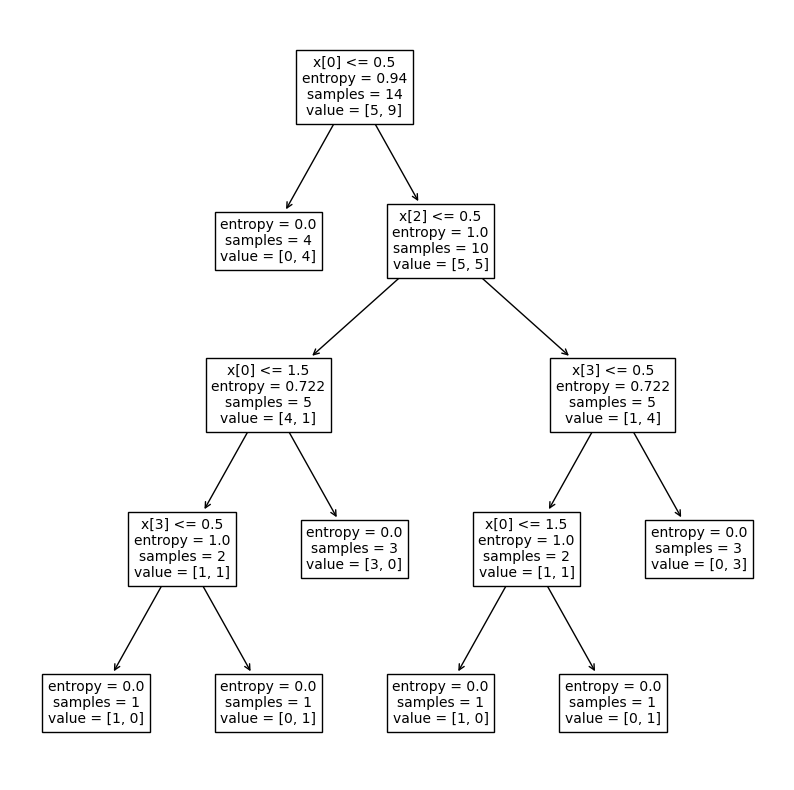

In [37]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion = 'entropy')
clf=clf.fit(ind_train,dep_train)
clf.fit(ind,dep)
fig,ax=mp.subplots(figsize=(10,10))
tree.plot_tree(clf,fontsize=10)
mp.show()

In [38]:
ind_pred=clf.predict(ind_test)

In [39]:
from id3 import Id3Estimator
from sklearn.metrics import classification_report, accuracy_score
estimator = Id3Estimator()
estimator.fit(ind_train,dep_train)
ind_pred=estimator.predict(ind_test)
classification_report(dep_test,ind_pred)

'              precision    recall  f1-score   support\n\n           0       0.33      1.00      0.50         1\n           1       1.00      0.67      0.80         6\n\n    accuracy                           0.71         7\n   macro avg       0.67      0.83      0.65         7\nweighted avg       0.90      0.71      0.76         7\n'

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(dep_test,ind_pred)

0.7142857142857143